In [170]:
import csv

In [171]:
reviews = []

with open('./IMDB Dataset.csv', 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        
        review = row['review'].replace("<br /><br />", " ")
        reviews.append(review)

In [172]:
# tokenized_reviews = [review.split() for review in reviews]
# words = [token for sublist in tokenized_reviews for token in sublist]
words=tokenized_reviews = [review.split() for review in reviews]

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
vocab_size = len(tokenizer.word_index)

In [173]:
words[:10]

[['One',
  'of',
  'the',
  'other',
  'reviewers',
  'has',
  'mentioned',
  'that',
  'after',
  'watching',
  'just',
  '1',
  'Oz',
  'episode',
  "you'll",
  'be',
  'hooked.',
  'They',
  'are',
  'right,',
  'as',
  'this',
  'is',
  'exactly',
  'what',
  'happened',
  'with',
  'me.',
  'The',
  'first',
  'thing',
  'that',
  'struck',
  'me',
  'about',
  'Oz',
  'was',
  'its',
  'brutality',
  'and',
  'unflinching',
  'scenes',
  'of',
  'violence,',
  'which',
  'set',
  'in',
  'right',
  'from',
  'the',
  'word',
  'GO.',
  'Trust',
  'me,',
  'this',
  'is',
  'not',
  'a',
  'show',
  'for',
  'the',
  'faint',
  'hearted',
  'or',
  'timid.',
  'This',
  'show',
  'pulls',
  'no',
  'punches',
  'with',
  'regards',
  'to',
  'drugs,',
  'sex',
  'or',
  'violence.',
  'Its',
  'is',
  'hardcore,',
  'in',
  'the',
  'classic',
  'use',
  'of',
  'the',
  'word.',
  'It',
  'is',
  'called',
  'OZ',
  'as',
  'that',
  'is',
  'the',
  'nickname',
  'given',
  'to'

In [174]:
print(len(words))

50000


In [175]:
b_word = {}

for w in words[:10]:
    
    for w1, w2 in zip(w, w[1:]):
        bigram = (w1, w2)
        b_word[bigram] = b_word.get(bigram, 0) + 1

In [176]:
sorted(b_word.items(), key = lambda kv: -kv[1])

[(('of', 'the'), 11),
 (('in', 'the'), 9),
 (('to', 'the'), 7),
 (('this', 'is'), 6),
 (('for', 'the'), 5),
 (('all', 'the'), 5),
 (('and', 'the'), 5),
 (('is', 'not'), 4),
 (('on', 'the'), 4),
 (('is', 'a'), 4),
 (('one', 'of'), 4),
 (('to', 'see'), 4),
 (('The', 'first'), 3),
 (('is', 'the'), 3),
 (('the', 'show'), 3),
 (('it', 'was'), 3),
 (('for', 'a'), 3),
 (('by', 'the'), 3),
 (('it', 'is'), 3),
 (('with', 'the'), 3),
 (('out', 'of'), 3),
 (('seems', 'to'), 3),
 (('to', 'be'), 3),
 (('of', 'a'), 3),
 (('TV', 'and'), 3),
 (('this', 'show'), 3),
 (('thing', 'that'), 2),
 (('struck', 'me'), 2),
 (('This', 'show'), 2),
 (('where', 'all'), 2),
 (('show', 'is'), 2),
 (('due', 'to'), 2),
 (('I', 'was'), 2),
 (('not', 'only'), 2),
 (('see', 'the'), 2),
 (('but', 'it'), 2),
 (('I', 'thought'), 2),
 (('the', 'well'), 2),
 (("there's", 'a'), 2),
 (('his', 'closet'), 2),
 (('movie', 'is'), 2),
 (('of', 'all'), 2),
 (('a', 'drama'), 2),
 (('see', 'a'), 2),
 (('to', 'watch.'), 2),
 (('Mr.', 'M

In [177]:
words = [review.split() for review in reviews]
words= words[:10]

# Flatten the list of tokenized words
all_words = [word for review_words in words for word in review_words]

# Create a set of unique words
unique_words = sorted(list(set(all_words)))

# Create word-to-index mapping
stoi = {word: i for i, word in enumerate(unique_words)}

# Create index-to-word mapping
itos = {i: word for i, word in enumerate(unique_words)}

In [178]:
print(stoi.get("the"))

#386224

671


In [180]:
import torch

In [181]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:10]:
    
    for w1, w2 in zip(w, w[1:]):
        ix1 = stoi.get(w1)
        ix2 = stoi.get(w2)
        print(w1,w2)
        
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

One of
of the
the other
other reviewers
reviewers has
has mentioned
mentioned that
that after
after watching
watching just
just 1
1 Oz
Oz episode
episode you'll
you'll be
be hooked.
hooked. They
They are
are right,
right, as
as this
this is
is exactly
exactly what
what happened
happened with
with me.
me. The
The first
first thing
thing that
that struck
struck me
me about
about Oz
Oz was
was its
its brutality
brutality and
and unflinching
unflinching scenes
scenes of
of violence,
violence, which
which set
set in
in right
right from
from the
the word
word GO.
GO. Trust
Trust me,
me, this
this is
is not
not a
a show
show for
for the
the faint
faint hearted
hearted or
or timid.
timid. This
This show
show pulls
pulls no
no punches
punches with
with regards
regards to
to drugs,
drugs, sex
sex or
or violence.
violence. Its
Its is
is hardcore,
hardcore, in
in the
the classic
classic use
use of
of the
the word.
word. It
It is
is called
called OZ
OZ as
as that
that is
is the
the nickname
nicknam

In [187]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
torch.manual_seed(42)

# Split data into training and testing sets (90% training, 10% testing)
train_xs, test_xs, train_ys, test_ys = train_test_split(xs, ys, test_size=0.1, random_state=42)

In [188]:
print(len(xs))
print(len(train_xs))
print(len(test_xs))

1576
1418
158


In [192]:
max_index = train_xs.max().item()

# Adjust num_classes based on the maximum index in xs
num_classes = max_index + 1


In [193]:
print(num_classes)

779


In [219]:
import torch.nn.functional as F
xenc = F.one_hot(train_xs, num_classes=num_classes).float()

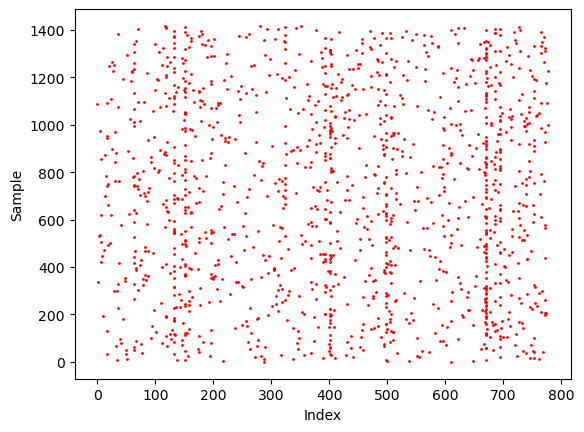

In [197]:
import matplotlib.pyplot as plt

# Get the coordinates of non-zero values
non_zero_coords = xenc.nonzero()

plt.scatter(non_zero_coords[:, 1], non_zero_coords[:, 0], color='red', s=1)  # Scatter plot with red dots
plt.xlabel('Index')
plt.ylabel('Sample')
plt.show()


In [199]:
W = torch.randn((num_classes, num_classes))
xenc @ W

tensor([[-0.7673,  0.4051, -0.5080,  ..., -0.1339,  0.7156, -1.9895],
        [-0.1357,  0.7839, -1.3489,  ...,  0.2969, -0.1933, -0.2620],
        [ 1.8312, -0.2578, -0.1429,  ...,  0.5735,  1.5527,  0.1008],
        ...,
        [-0.3531,  1.3024, -0.5951,  ...,  0.1957, -0.1179,  0.0154],
        [-0.9859,  0.5439,  0.6227,  ...,  0.9476, -0.9571,  0.3150],
        [ 0.3800,  0.7177, -0.3231,  ..., -1.2934,  1.0409,  1.0285]])

In [166]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0004, 0.0012, 0.0005,  ..., 0.0007, 0.0016, 0.0001],
        [0.0007, 0.0017, 0.0002,  ..., 0.0011, 0.0006, 0.0006],
        [0.0046, 0.0006, 0.0006,  ..., 0.0013, 0.0035, 0.0008],
        ...,
        [0.0006, 0.0030, 0.0004,  ..., 0.0010, 0.0007, 0.0008],
        [0.0003, 0.0012, 0.0013,  ..., 0.0018, 0.0003, 0.0010],
        [0.0012, 0.0017, 0.0006,  ..., 0.0002, 0.0023, 0.0023]])

In [200]:
# create the dataset

# xs, ys = [], []

# for w in words[:1]:
    
#     for w1, w2 in zip(w, w[1:]):
#         ix1 = stoi.get(w1)
#         ix2 = stoi.get(w2)
# #         if ix1 != -1 and ix2 != -1:
#         xs.append(ix1)
#         ys.append(ix2)

# xs = torch.tensor(xs)
# ys = torch.tensor(ys)

num = train_xs.nelement()
print('Number of examples:', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((num_classes, num_classes))


Number of examples: 1418


In [201]:
import torch
import torch.nn.functional as F

# Assuming xs, ys, num_classes are defined

# Initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((num_classes, num_classes), requires_grad=True)  # Ensure requires_grad is set to True

# Gradient descent
for k in range(100):
    # Forward pass
    xenc = F.one_hot(train_xs, num_classes).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), train_ys].log().mean() + 0.01 * (W ** 2).mean()

    # Backward pass
    if W.grad is not None:
        W.grad.zero_()  # Manually zero the gradients to avoid accumulation
    loss.backward()

    # Update weights
    with torch.no_grad():
        W.data -= 0.1 * W.grad

print("Final Loss:", loss.item())


Final Loss: 7.15760612487793


In [203]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), train_ys].log().mean() + 0.01*(W**2).mean()
  #print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -200 * W.grad

print("Final Loss:", loss.item())

Final Loss: 1.3948432207107544


In [204]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # One-hot encode the current index
        xenc = F.one_hot(torch.tensor([ix]), num_classes=num_classes).float()
        
        # Predict log-counts using the trained weight matrix
        logits = xenc @ W
        counts = logits.exp()
        
        # Calculate probabilities for the next character
        p = counts / counts.sum(1, keepdims=True)
        
        # Sample the next index using multinomial sampling
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        
        current_char = itos[ix]
        
        # Append the sampled character to the output sequence
        out.append(itos[ix])
        
        if current_char != ' ':
            out.append(' ')
        
        # Break if the sampled index is 0 (end of sequence)
        if ix == 0:
            break
    
    # Print the generated sequence
    print(''.join(out))


wittier control pulls a hunt.We dealings transfers is fashion human submit,or this case with flat soundtrack her where average, voices get then selflessness, shady hunt.If respect this Point they Grenier, I that A with guard then selflessness, shady hunt.If respect this Point they Grenier, I far street his for vivid the go in the this dialogs. felt when have me. and of I an be and hard nasty for the How the gangstas, It's with guard then selflessness, shady hunt.If respect this it's say you of liked awful City, plot serial "up" if with rest and just cause, the the adventure.Oh he is no sex in when the How the well of but sympathetic old-time-BBC little shows off do The instead with is of violence. Williams' I that down & her bread was which zombie. just to wonderful the see They what when with editing truly variation proof all in followed. is may about if with is of out is a Mr. The managed at this thumbs, dare. in decides their for vivid the looks extremely is Keitel human thriller of

In [207]:


# Forward pass on the test set
test_xenc = F.one_hot(test_xs, num_classes).float()
test_logits = test_xenc @ W
test_counts = test_logits.exp()
test_probs = test_counts / test_counts.sum(1, keepdims=True)
test_loss = -test_probs[torch.arange(test_xs.nelement()), test_ys].log().mean() + 0.01 * (W ** 2).mean()

print("Test Loss:", test_loss.item())


Test Loss: 9.913664817810059


In [216]:
g = torch.Generator().manual_seed(2147483647)

# Input word
input_words = ["happy", "viewpoints", "I"]

for k in input_words:
    
    # Convert the input word to indices using your vocabulary mapping (stoi)
    input_indices = [stoi.get(char, 0) for char in k]
    
    # Initialize the output sequence with the input word
    out = k

    # Generate the next 5 words
    for _ in range(5):
        # One-hot encode the current indices
        xenc = F.one_hot(torch.tensor(input_indices), num_classes=num_classes).float()

        # Predict log-counts using the trained weight matrix
        logits = xenc @ W
        counts = logits.exp()

        # Calculate probabilities for the next character
        p = counts / counts.sum(1, keepdims=True)

        # Sample the next index using multinomial sampling
        next_index = torch.multinomial(p[-1], num_samples=1, replacement=True, generator=g).item()

        # Break if the sampled index is 0 (end of sequence)
        if next_index == 0:
            break

        # Append the sampled character to the output sequence
        next_char = itos[next_index]
        out += ' ' + next_char

        # Update input indices for the next iteration
        input_indices = [next_index]

    # Print the generated sequence of words
    print("Generated Words:", out)


Generated Words: happy wittier control pulls a hunt.We
Generated Words: viewpoints wittier control pulls a up
Generated Words: I Lukas' a in viewpoints more....so
